## ISING MODEL COLORBAR CODE

In [ ]:
import random
import numpy as np
from math import *
from numpy import *
from pylab import *
import datetime
from matplotlib.pyplot import pcolormesh , show

k , iterations , parallel , dt = 70 , 200 , 0 , 100  ######### k: Dimensions of the array and dt: time step for returns ########
J , alpha , beta = 1 , 3 , 1 ########### J: exchange constant , alpha: Global Coupling Constant and beta: determines slope of probability distribution ##########
spinArray = h = np.matrix(np.zeros((70, 70), dtype = np.int))
for i in range(70):
    for j in range(70):
        spinArray[i,j] = round(np.random.randint(0,1))*2-1 ####### fill the array with -1 or +1 randomly #######
mag = prob = r = returns = np.matrix(np.zeros((iterations, 1), dtype = np.int)) 
stock = np.matrix(np.ones((iterations, 1), dtype = np.int))

# For ising Calulations
for t in range(iterations): 
    for l in range(k):
        for p in range(k):
            mag[t] = mag[t] + (1/pow(k,2))*spinArray[l,p]
    for n in range(k):
      for m in range(k):
        if parallel == 0:
            n = round(np.random.random()*(k-1))
            m = round(np.random.random()*(k-1))
            Center = spinArray[n,m]
            if n==0:
              Top = spinArray[k-1,m]
            else:
              Top = spinArray[n-1,m]
            if n==k-1:
              Bottom = spinArray[0,m]
            else:
              Bottom = spinArray[n+1,m]
            if m==k-1:
              Right = spinArray[n,0]
            else:
              Right = spinArray[n,m+1]
            if m==0:
              Left = spinArray[n,k-1]
            else:
              Left = spinArray[n,m-1]
      h[n,m] = J*(Top+Bottom+Left+Right)*Center-alpha*abs(mag[t])
      prob[t] = 1/(1+exp(-1*beta*h[n,m]))
      if h[n,m] <= 0:
        spinArray[n,m] = -spinArray[n,m]
      else:
        r[t] = np.random.random()
        if r[t] >= prob[t]:
          spinArray[n,m] = -spinArray[n,m]

    if t>1:
      returns[t] = mag[t] - mag[t-1]
      stock[t] = stock[t-1] + returns[t]
        
    now = datetime.datetime.now()
    time = now.strftime("%H:%M:%S")
    figure(1)
    figsize=(18,50)
    title("ISING MODEL",fontsize=18)
    xlabel(f"Alpha = {alpha} , Beta = {beta} , Time = {time}",fontsize=12)
    y = spinArray.tolist()
    pcolor(y,edgecolors='k', linewidths=0.4)
    #savefig(f"{t}.png")
    show()

## DOWNLOADING DATA FROM YAHOO FINANCE

In [21]:
import pandas as pd
import yfinance as yf

stock_data = yf.download(["^GSPC"], start="1981-01-02", end="2015-10-20")  ##### ^GSPC is represents S&P 500 Stock #####
stock_data.to_excel('SP Data.xlsx')

[*********************100%***********************]  1 of 1 completed


## IMPORTING DATA INTO PYTHON

In [35]:
from pylab import *
from numpy import *
from pandas import *
from math import *
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

IsingModel = 0      ##### TOGGLE b/w "STOCK MARKET" DATA and "ISING MODEL" DATA #####
                    ##### 0 for stock market data and 1 for ising model data #####

if IsingModel == 0:    
    data = read_excel("Data/S&P 500/SP Data.xlsx") ##### Replace 'S&P 500' with 'NIFTY 50' to TOGGLE ######
    dailyValue = transpose(data.Close)                                       
    returns = transpose(data.Simple_Returns) 
else:
    data = read_excel("Data/S&P 500/stock.xlsx")    
    dailyValue = transpose(data.Stock_Prices)       ##### THIS WILL REMAIN THE SAME FOR BOTH CASES #####
    data1 = read_excel("Data/S&P 500/returns.xlsx")
    returns = transpose(data1.Returns) 
    
    
dataSize = size(dailyValue)
startDate = date.toordinal(date(year=1981, month=1, day=2))  ##### SETTING X-AXIS AS THE DAYS ##### 
endDate = date.toordinal(date(year=2015, month=10, day=20))
xData = linspace(startDate,endDate,dataSize)


## PLOTTING STOCKS

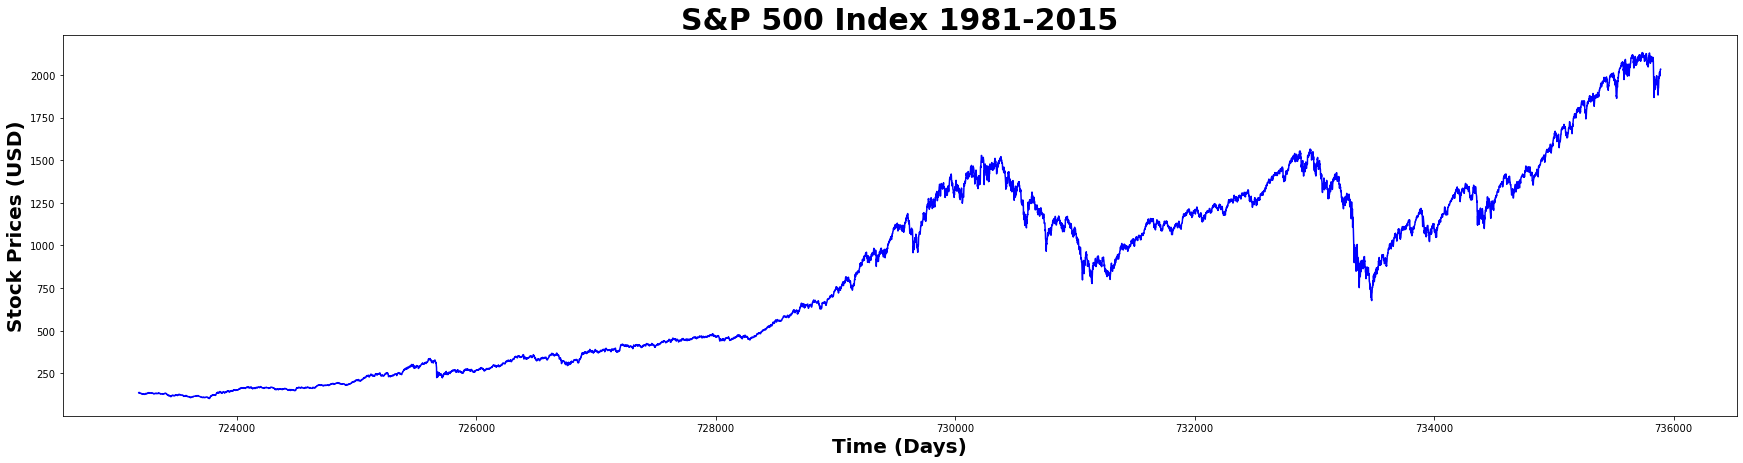

In [36]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(30,7))
    axs.plot(xData,dailyValue,'blue')
    axs.set_title('S&P 500 Index 1981-2015',fontsize=30,fontweight='bold')
    #axs.set_title('NIFTY 50 Index 2007-2021',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Stock Prices (USD)',fontsize=20,fontweight='bold')
else:
    fig, axs = plt.subplots(figsize=(30,7))
    axs.plot(xData,dailyValue,'blue')
    axs.set_title('Ising Model Stocks',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Stock Prices (USD)',fontsize=20,fontweight='bold')

## PLOTTING DAILY RETURNS

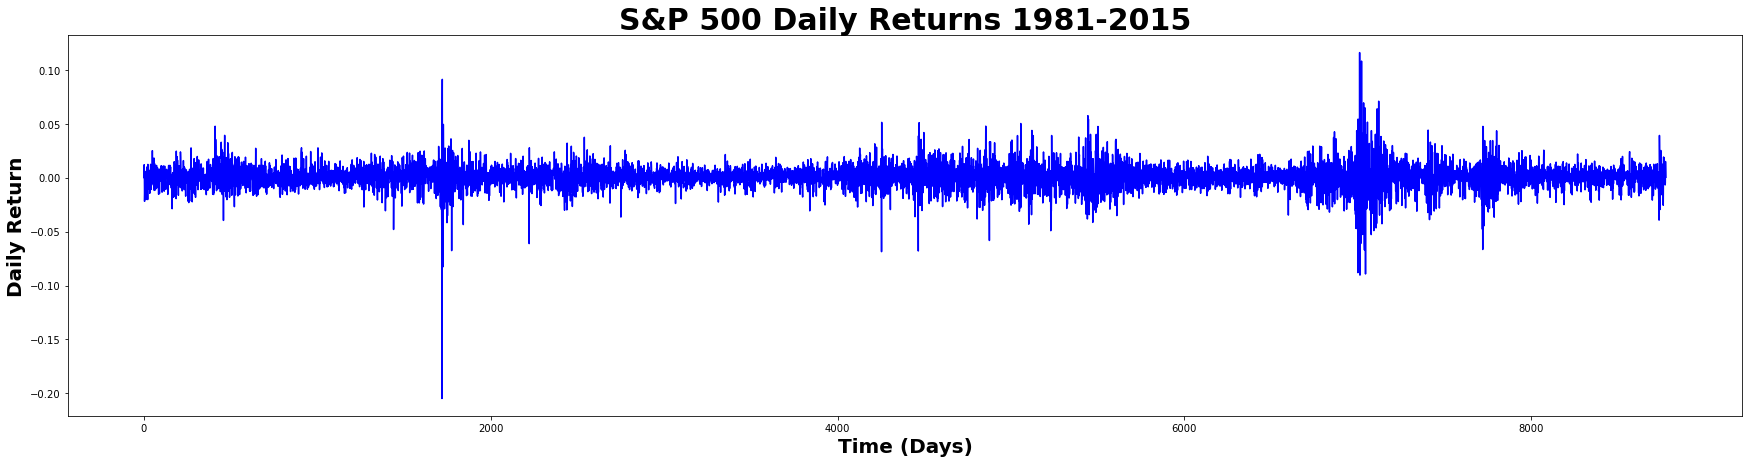

In [37]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(30,7))
    axs.plot(returns,'blue')
    axs.set_title('S&P 500 Daily Returns 1981-2015',fontsize=30,fontweight='bold')
    #axs.set_title('NIFTY 50 Daily Returns 2007-2021',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Daily Return',fontsize=20,fontweight='bold')
else:
    fig, axs = plt.subplots(figsize=(30,8))
    axs.plot(returns,'blue')
    axs.set_title('Ising Model Daily Returns',fontsize=30,fontweight='bold')
    axs.set_xlabel('Time (Days)',fontsize=20,fontweight='bold')
    axs.set_ylabel('Daily Returns (USD)',fontsize=20,fontweight='bold')

## PLOTTING HISTOGRAM OF DAILY RETURNS

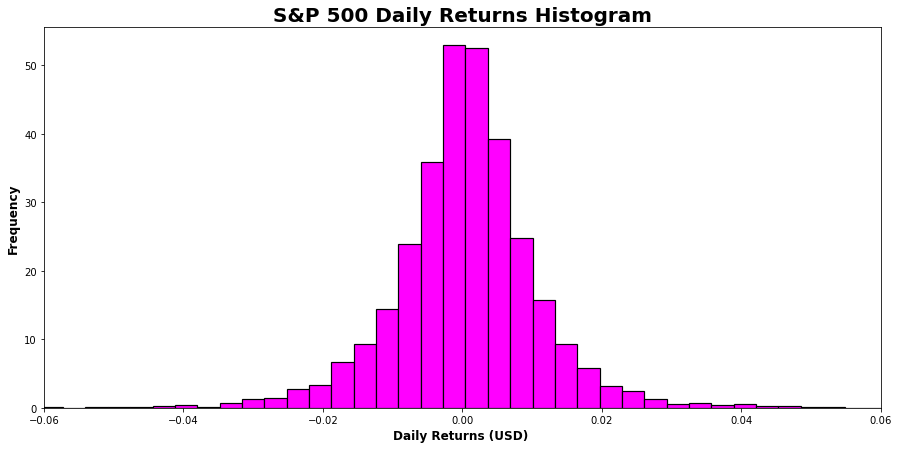

In [31]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(15,7))
    axs.hist(returns,100,density=True,edgecolor='black', linewidth=1.2, facecolor='fuchsia')
    axs.set_title('S&P 500 Daily Returns Histogram',fontsize=20,fontweight='bold')
    #axs.set_title('NIFTY 50 Daily Returns Histogram',fontsize=20,fontweight='bold')
    axs.set_xlabel('Daily Returns (USD) ',fontsize=12,fontweight='bold')
    axs.set_ylabel('Frequency',fontsize=12,fontweight='bold')
    axs.set_xlim(-0.06,0.06)
else:
    fig, axs = plt.subplots(figsize=(15,7))
    axs.hist(returns,30,density=True,edgecolor='black', linewidth=1.2, facecolor='fuchsia')
    axs.set_title('Ising Model Daily Returns Histogram',fontsize=20,fontweight='bold')
    axs.set_xlabel('Daily Returns (USD) ',fontsize=12,fontweight='bold')
    axs.set_ylabel('Frequency',fontsize=12,fontweight='bold')


## AUTOCORRELATION OF RETURNS

In [32]:
##### DEFINING CONSTANTS #####
nmax , C , sigma , mu , n , dn , average , tauMax  = size(returns) , 0 , 0.2 , 0 , 0 , 1 , 0 , 180 
for i in range(dataSize-1):
    average += returns[i]
average = average/dataSize
ACReturns = zeros(tauMax)
n = 0
X = linspace(0,tauMax,180)

for tau in range(tauMax):
    numerator = 0
    denominator = 0
    for m in range(tau,dataSize-1):
        numerator += ((abs(returns[m])-abs(average))*(abs(returns[m-tau])-abs(average)))
        denominator += ((abs(returns[m-tau])-abs(average))**2)
    ACReturns[n] = numerator/denominator
    n += 1

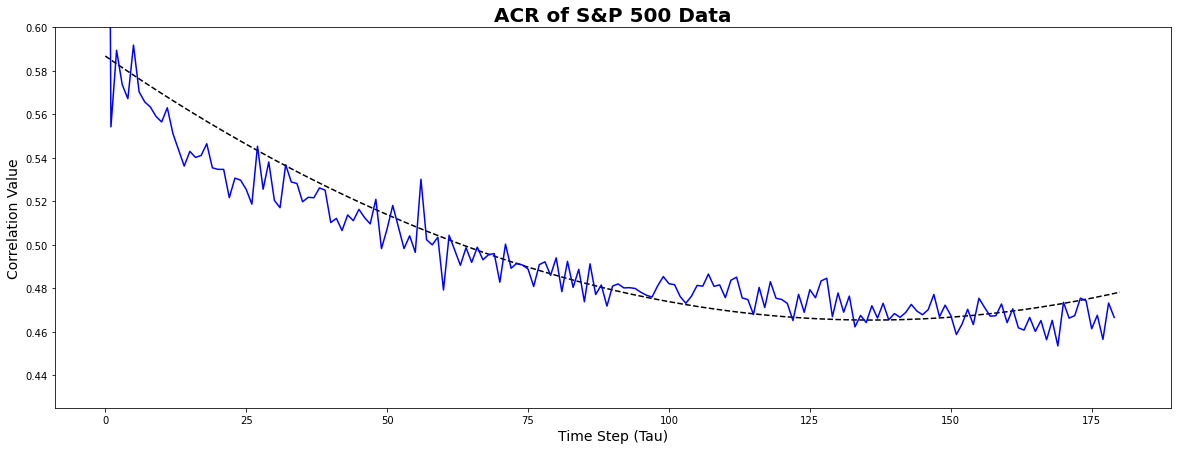

In [34]:
if IsingModel == 0:
    fig, axs = plt.subplots(figsize=(20,7))
    z = np.polyfit(X, ACReturns, 2)
    p = np.poly1d(z)
    axs.plot(X,p(X),"k--",linewidth=1.5)
    axs.plot(ACReturns,'blue')
    axs.set_title('ACR of S&P 500 Data',fontsize=20,fontweight='bold')
    #axs.set_title('ACR of NIFTY 50 Data',fontsize=20,fontweight='bold')
    axs.set_xlabel('Time Step (Tau)',fontsize=14)
    axs.set_ylabel('Correlation Value',fontsize=14)
    axs.set_ylim(0.425,0.60)
else:
    fig, axs = plt.subplots(figsize=(20,7))
    #z = np.polyfit(X, ACReturns, 2)
    #p = np.poly1d(z)
    #axs.plot(X,p(X),"k--",linewidth=1.5)
    axs.plot(ACReturns,'blue')
    axs.set_title('ACR of Ising Model Data',fontsize=20,fontweight='bold')
    axs.set_xlabel('Time Step (Tau)',fontsize=14,fontweight='bold')
    axs.set_ylabel('Correlation Value',fontsize=14,fontweight='bold')
    axs.set_ylim(0.615,0.65)

<img src= 'Data/Random ACR.png' width=750px  >